In [3]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model, model_to_dot
import pydot
import os

def build_cnn_lstm_model():
    inputs = layers.Input(shape=(100, 6), name="input_layer")
    x = layers.Conv1D(32, 3, activation="relu", name="conv1d_1")(inputs)
    x = layers.MaxPooling1D(2, name="maxpool1d_1")(x)
    x = layers.Conv1D(64, 3, activation="relu", name="conv1d_2")(x)
    x = layers.MaxPooling1D(2, name="maxpool1d_2")(x)
    x = layers.LSTM(32, name="lstm")(x)
    x = layers.Dense(32, activation="relu", name="dense_1")(x)
    outputs = layers.Dense(1, activation="sigmoid", name="output")(x)
    model = models.Model(inputs, outputs, name="CNN_LSTM")
    return model

model = build_cnn_lstm_model()


In [4]:
# 1. Make sure Graphviz bin is on your PATH (so 'dot' is found)
# 2. pip install pydot

# Grab the raw dot graph
dot = model_to_dot(
    model,
    show_shapes=True,
    show_layer_names=True
)

# Global graph settings
dot.set_graph_defaults(
    rankdir='LR',    # Left→Right
    dpi='150'
)

# Style each node
for node in dot.get_nodes():
    node.set_style('rounded,filled')
    node.set_fillcolor('#AED6F1')    # light blue
    node.set_color('#1B4F72')        # dark border
    node.set_fontcolor('#1B2631')
    node.set_fontsize('12')

# Save
dot.write_png('model_pretty.png')


In [ ]:
import subprocess
import sys

# 1) Ensure visualkeras + pillow are installed
try:
    import visualkeras
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install",
                           "git+https://github.com/paulgavrik/visualkeras",
                           "pillow"])
    import visualkeras

# 2) Now pull in the font helper
from PIL import ImageFont

# 3) (Optional) Point to a .ttf on your system for nicer labels
#    On Windows this might be "arial.ttf" in your fonts folder:
font = ImageFont.truetype("arial.ttf", 16)

# 4) Generate & save the layered (3D‑ish) view
visualkeras.layered_view(
    model,
    to_file='model_visualkeras_fixed.png',
    legend=True,
    font=font,
    spacing=(20, 20),
    scale_xy=(2, 2),
)


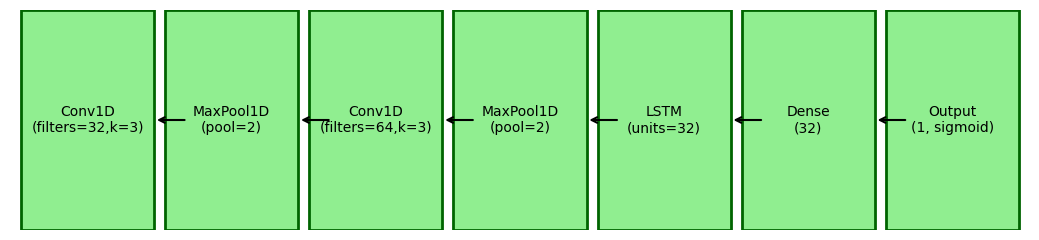

In [6]:
import matplotlib.pyplot as plt

layers  = [
    "Conv1D\n(filters=32,k=3)",
    "MaxPool1D\n(pool=2)",
    "Conv1D\n(filters=64,k=3)",
    "MaxPool1D\n(pool=2)",
    "LSTM\n(units=32)",
    "Dense\n(32)",
    "Output\n(1, sigmoid)"
]
n = len(layers)
fig, ax = plt.subplots(figsize=(n*1.5, 2.5))

for i, label in enumerate(layers):
    # draw box
    rect = plt.Rectangle((i*1.3, 0), 1.2, 1, fc='lightgreen', ec='darkgreen', lw=2, zorder=1)
    ax.add_patch(rect)
    ax.text(i*1.3 + 0.6, 0.5, label, ha='center', va='center', fontsize=10, zorder=2)

    # arrow to next
    if i < n-1:
        ax.annotate(
            "",
            xy=(i*1.3 + 1.2, 0.5),
            xytext=(i*1.3 + 1.5, 0.5),
            arrowprops=dict(arrowstyle='->', lw=1.5),
        )

ax.set_xlim(-0.1, n*1.3)
ax.set_ylim(0, 1)
ax.axis('off')
plt.tight_layout()
plt.savefig('model_schematic.png', dpi=150)
